In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 

STEP 1. LOOK AT THE BIG PICTURE (DONE)

STEP 2. GET THE DATA (DONE). LOAD DATA

In [35]:
raw_data = pd.read_csv(r'dataset/Data.csv')
# raw_data.head(10) preview the first 10 column
#raw_data.tail() preview the last 10 column 

STEP 3. DISCOVER THE DATA TO GAIN INSIGHTS


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1694 non-null   object 
 1   datetime          1694 non-null   object 
 2   tempmax           1694 non-null   float64
 3   tempmin           1694 non-null   float64
 4   temp              1694 non-null   float64
 5   feelslikemax      1694 non-null   float64
 6   feelslikemin      1694 non-null   float64
 7   feelslike         1694 non-null   float64
 8   dew               1694 non-null   float64
 9   humidity          1694 non-null   float64
 10  precip            1694 non-null   float64
 11  precipprob        1694 non-null   int64  
 12  precipcover       1694 non-null   float64
 13  preciptype        1238 non-null   object 
 14  snow              1694 non-null   int64  
 15  snowdepth         1694 non-null   int64  
 16  wi

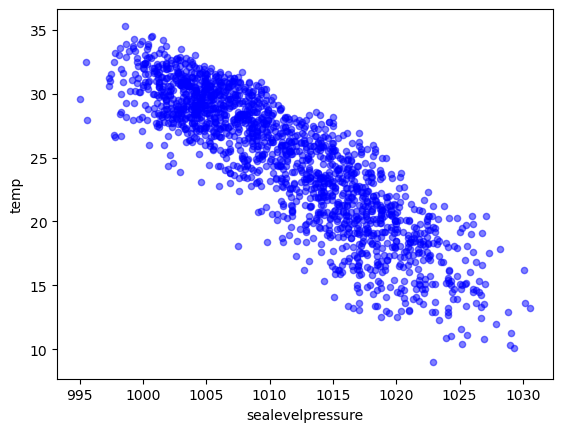

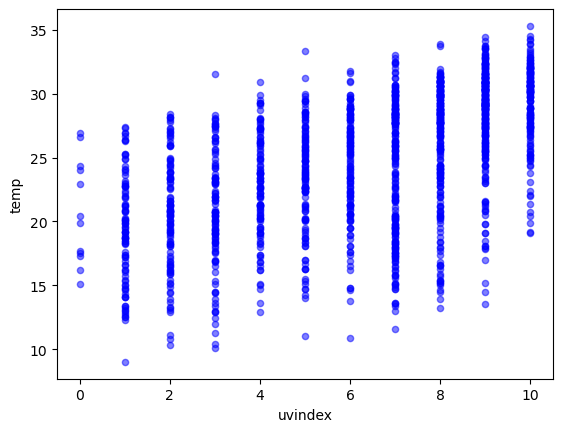

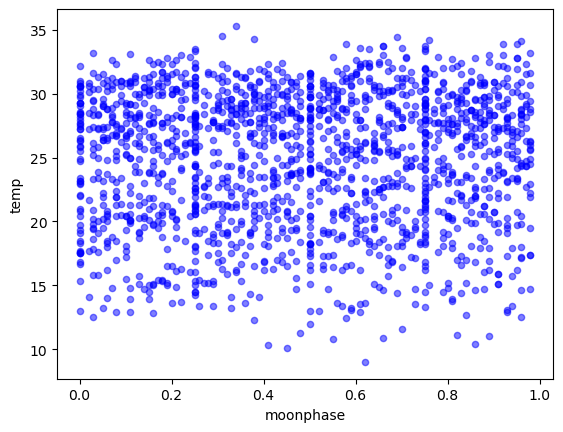

In [36]:
# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())              
print('\n____________ Some first data examples ____________')
print(raw_data.head(5)) 
print('\n____________ Counts on a feature ____________')
# print(raw_data['LEGAL DOCUMENTS'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())    
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,1,45], [2, 5]] ) # Refer using column ID

#3.2: Scatter plot b/w 2 features
if 1:
    raw_data.plot(kind="scatter", y="temp", x="sealevelpressure", alpha= 0.5, color = 'b')
    # plt.axis([0, 1000, 0, 1000])
    plt.savefig('figures/scatter_1_feat.png', format='png', dpi=100)
    plt.show()  
if 2:
    raw_data.plot(kind="scatter", y="temp", x="uvindex", alpha= 0.5, color = 'b')
    # plt.axis([0, 1000, 0, 1000])
    plt.savefig('figures/scatter_1_feat.png', format='png', dpi=100)
    plt.show()
if 3:
    raw_data.plot(kind="scatter", y="temp", x="moonphase", alpha= 0.5, color = 'b')
    # plt.axis([0, 1000, 0, 1000])
    plt.savefig('figures/scatter_1_feat.png', format='png', dpi=100)
    plt.show()    

# 3.3 Scatter plot b/w every pair of features
if 0:
    from pandas.plotting import scatter_matrix   
    features_to_plot = ["PRICE IN MILLION VND", "NUMBER OF BEDROOMS", "NUMBER OF TOILETS", "AREA IN M2"]
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
    plt.savefig('figures/scatter_mat_all_feat.png', format='png', dpi=300)
    plt.show()